In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
import matplotlib
from matplotlib.colors import LogNorm


matplotlib.style.use('ggplot')
# Load data from the CSV file (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('logs2.csv')

data.head()

x = data['worker']
y = data[' file']
z_time = data[' time ']

# data[' file'].nunique()

len(x)

# Save the plot as an image (e.g., 'contour_plo


1248

In [37]:
sdf = pd.read_csv('serial_logs.csv')
fls = sdf['file']
tls = sdf['time']

serial_time = {f: t for f, t in zip(fls, tls)}

avg_time = []

for f,t in zip(fls,tls):
    avg_time.append(t/f)

avg_time = np.mean(avg_time)

print(avg_time)
    # print(f,t)


0.3222219559927321


In [38]:

unique_x = np.unique(x)
len(unique_x)

32

[0.007565437597580721, 0.011948366983468305, 0.06293690760647735, 0.008554918830433834, 0.009238258026725992, 0.055603824961939295, 0.025052538919587353, 0.034378778226209064, 0.02916170017587583, 0.005563616185720663, 0.019041605812206222, 0.01890629564541498, 0.008753495206662444, 0.006317704236821365, 0.02119235280969015, 0.01452943018986586, 0.03747701740774353, 0.05779572257702505, 0.018628429527248535, 0.03570382872696101, 0.0071385510021753544, 0.06678103053217078, 0.006341578518302306, 0.012353669445262743, 0.009374187724662614, 0.021455686756739308, 0.011240728615319637, 0.05784132534276348, 0.007365668778130546, 0.024321782322786943, 0.00978434157576749, 0.00701406757217469, 0.07554332274845361, 0.007895752811056192, 0.020410082232591817, 0.04005258654829917, 0.013076217238397626, 0.04886730302510309, 0.057743688154693794, 0.015379922368703842, 0.03653335976506568, 0.008533354837183935, 0.03605015888276413, 0.020511524708431775, 0.010040240808666187, 0.006788405733459341, 0.0

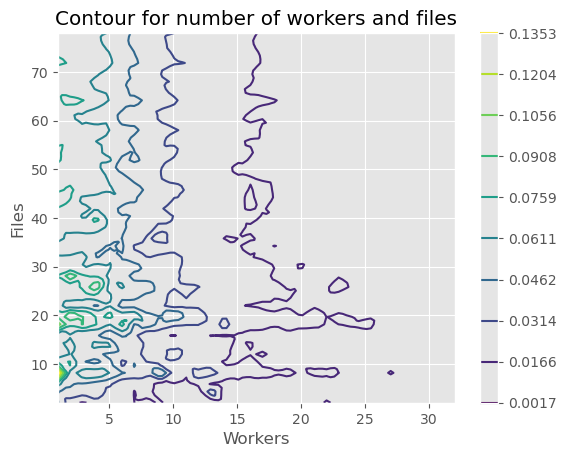

In [39]:
# Define grid for contour plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

z_new = []

# p, n , t
for x_val, y_val, z_val in zip(x,y, z_time):
    
    K = serial_time[y_val]/(x_val * z_val)
    # try:
    #     ts = serial_time[y_val]
    # except:
    #     ts_array = []
    #     for key, val in serial_time.items():
    #         ts_array.append(val/key)
    #     ts = np.mean(ts_array)*y_val
    
    # t_o = x_val*z_val - ts
    # K = y_val/t_o
    # # print(K)
    # # sys.exit()
    z_new.append(K)
    
#     z_new.append( serial_time[y_val]/ z_val)   
    # if z_val / serial_time[y_val] < 50:
        # print(x_val, y_val, z_val, serial_time[y_val], z_val / serial_time[y_val])

z = z_new
print(z)

# print(max(z))
z_grid = griddata((x, y), z, (x_grid, y_grid))

# levels = [20, 30, 40, 60, 100, 150, 200, 300]

lev = [5*i for i in range(0, 21)]

quartiles = np.percentile(z, lev)

# Determine contour levels at every 10%
contour_levels = np.arange(quartiles[0], quartiles[-1], (quartiles[-1] - quartiles[0]) * 0.1)



# Create contour plot with heatmap-like coloring
CS = plt.contour(x_grid, y_grid, z_grid, levels = contour_levels)
# plt.clabel(CS, inline=2, fontsize=10)
plt.colorbar(CS)

# plt.colorbar()  # Add colorbar for heatmap
plt.xlabel('Workers')
plt.ylabel('Files')
plt.title('Contour for number of workers and files')

# Show the plot
plt.show()


[0.2193976903298409, 0.2509157066528344, 0.18881072281943206, 0.21387297076084588, 0.20324167658797185, 0.2780191248096965, 0.2755779281154609, 0.30940900403588156, 0.174970201055255, 0.08901785897153061, 0.34274890461971197, 0.3214070259720546, 0.2188373801665611, 0.06317704236821364, 0.2755005865259719, 0.2905886037973172, 0.3747701740774353, 0.2889786128851253, 0.29805487243597656, 0.32133445854264914, 0.19274087705873455, 0.06678103053217078, 0.19024735554906919, 0.2594270583505176, 0.2531030685658906, 0.3218353013510896, 0.2360553009217124, 0.2892066267138174, 0.2283357321220469, 0.3405049525190172, 0.2739615641214897, 0.22445016230959008, 0.30217329099381446, 0.15001930341006764, 0.26533106902369363, 0.16021034619319668, 0.14383838962237389, 0.2932038181506185, 0.34646212892816275, 0.2768386026366692, 0.29226687812052543, 0.20480051609241443, 0.3244514299448772, 0.04102304941686355, 0.2510060202166547, 0.2172289834706989, 0.32648393432125034, 0.2093892219195631, 0.324696673554455

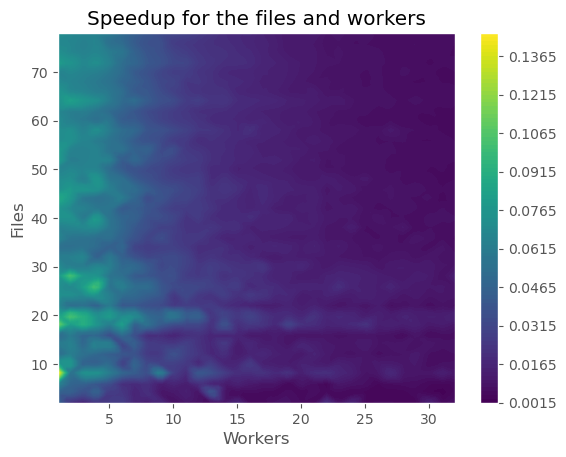

In [40]:
# Define grid for contour plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

z_new = []

# p, n , t
for x_val, y_val, z_val in zip(x,y, z_time):
    # K = serial_time[y_val]/z_val
    try:
        ts = serial_time[y_val]
    except:
        ts_array = []
        for key, val in serial_time.items():
            ts_array.append(val/key)
        ts = np.mean(ts_array)*y_val
    
    K = ts/z_val
    z_new.append(K)
    
#     z_new.append( serial_time[y_val]/ z_val)   
    # if z_val / serial_time[y_val] < 50:
        # print(x_val, y_val, z_val, serial_time[y_val], z_val / serial_time[y_val])

z = z_new
print(z)

# for x_val, y_val, z_val in zip(x,y, z_time):
#     K = serial_time[y_val]/z_val
    
#     if K == max(z):
#         print(x_val, y_val, z_val, serial_time[y_val], serial_time[y_val]/z_val)
# from scipy.ndimage.filters import gaussian_filter
# z_grid = gaussian_filter(z_grid, sigma=.6)

# levels = [20, 30, 40, 60, 100, 150, 200, 300]

# lev = [5*i for i in range(0, 21)]

quartiles = np.percentile(z, lev)

# Determine contour levels at every 10%
contour_levels = np.arange(quartiles[0], quartiles[-1], (quartiles[-1] - quartiles[0]) * 0.1)



# Create contour plot with heatmap-like coloring
CS = plt.contourf(x_grid, y_grid, z_grid, levels = 100)
# plt.clabel(CS, inline=2, fontsize=10)
plt.colorbar(CS)

# plt.colorbar()  # Add colorbar for heatmap
plt.xlabel('Workers')
plt.ylabel('Files')
plt.title('Speedup for the files and workers')

# Show the plot
plt.savefig('speedup.png', dpi=300)


plt.show()


In [41]:
z_new = []

# p, n , t
for x_val, y_val, z_val in zip(x,y, z_time):
    E = serial_time[y_val]/(x_val*z_val)
    
    z_new.append(E)
    
z = z_time
print(len(z))
print(type(z))
print(type(z_new))

z = z_new
z = np.array(z)

1248
<class 'pandas.core.series.Series'>
<class 'list'>


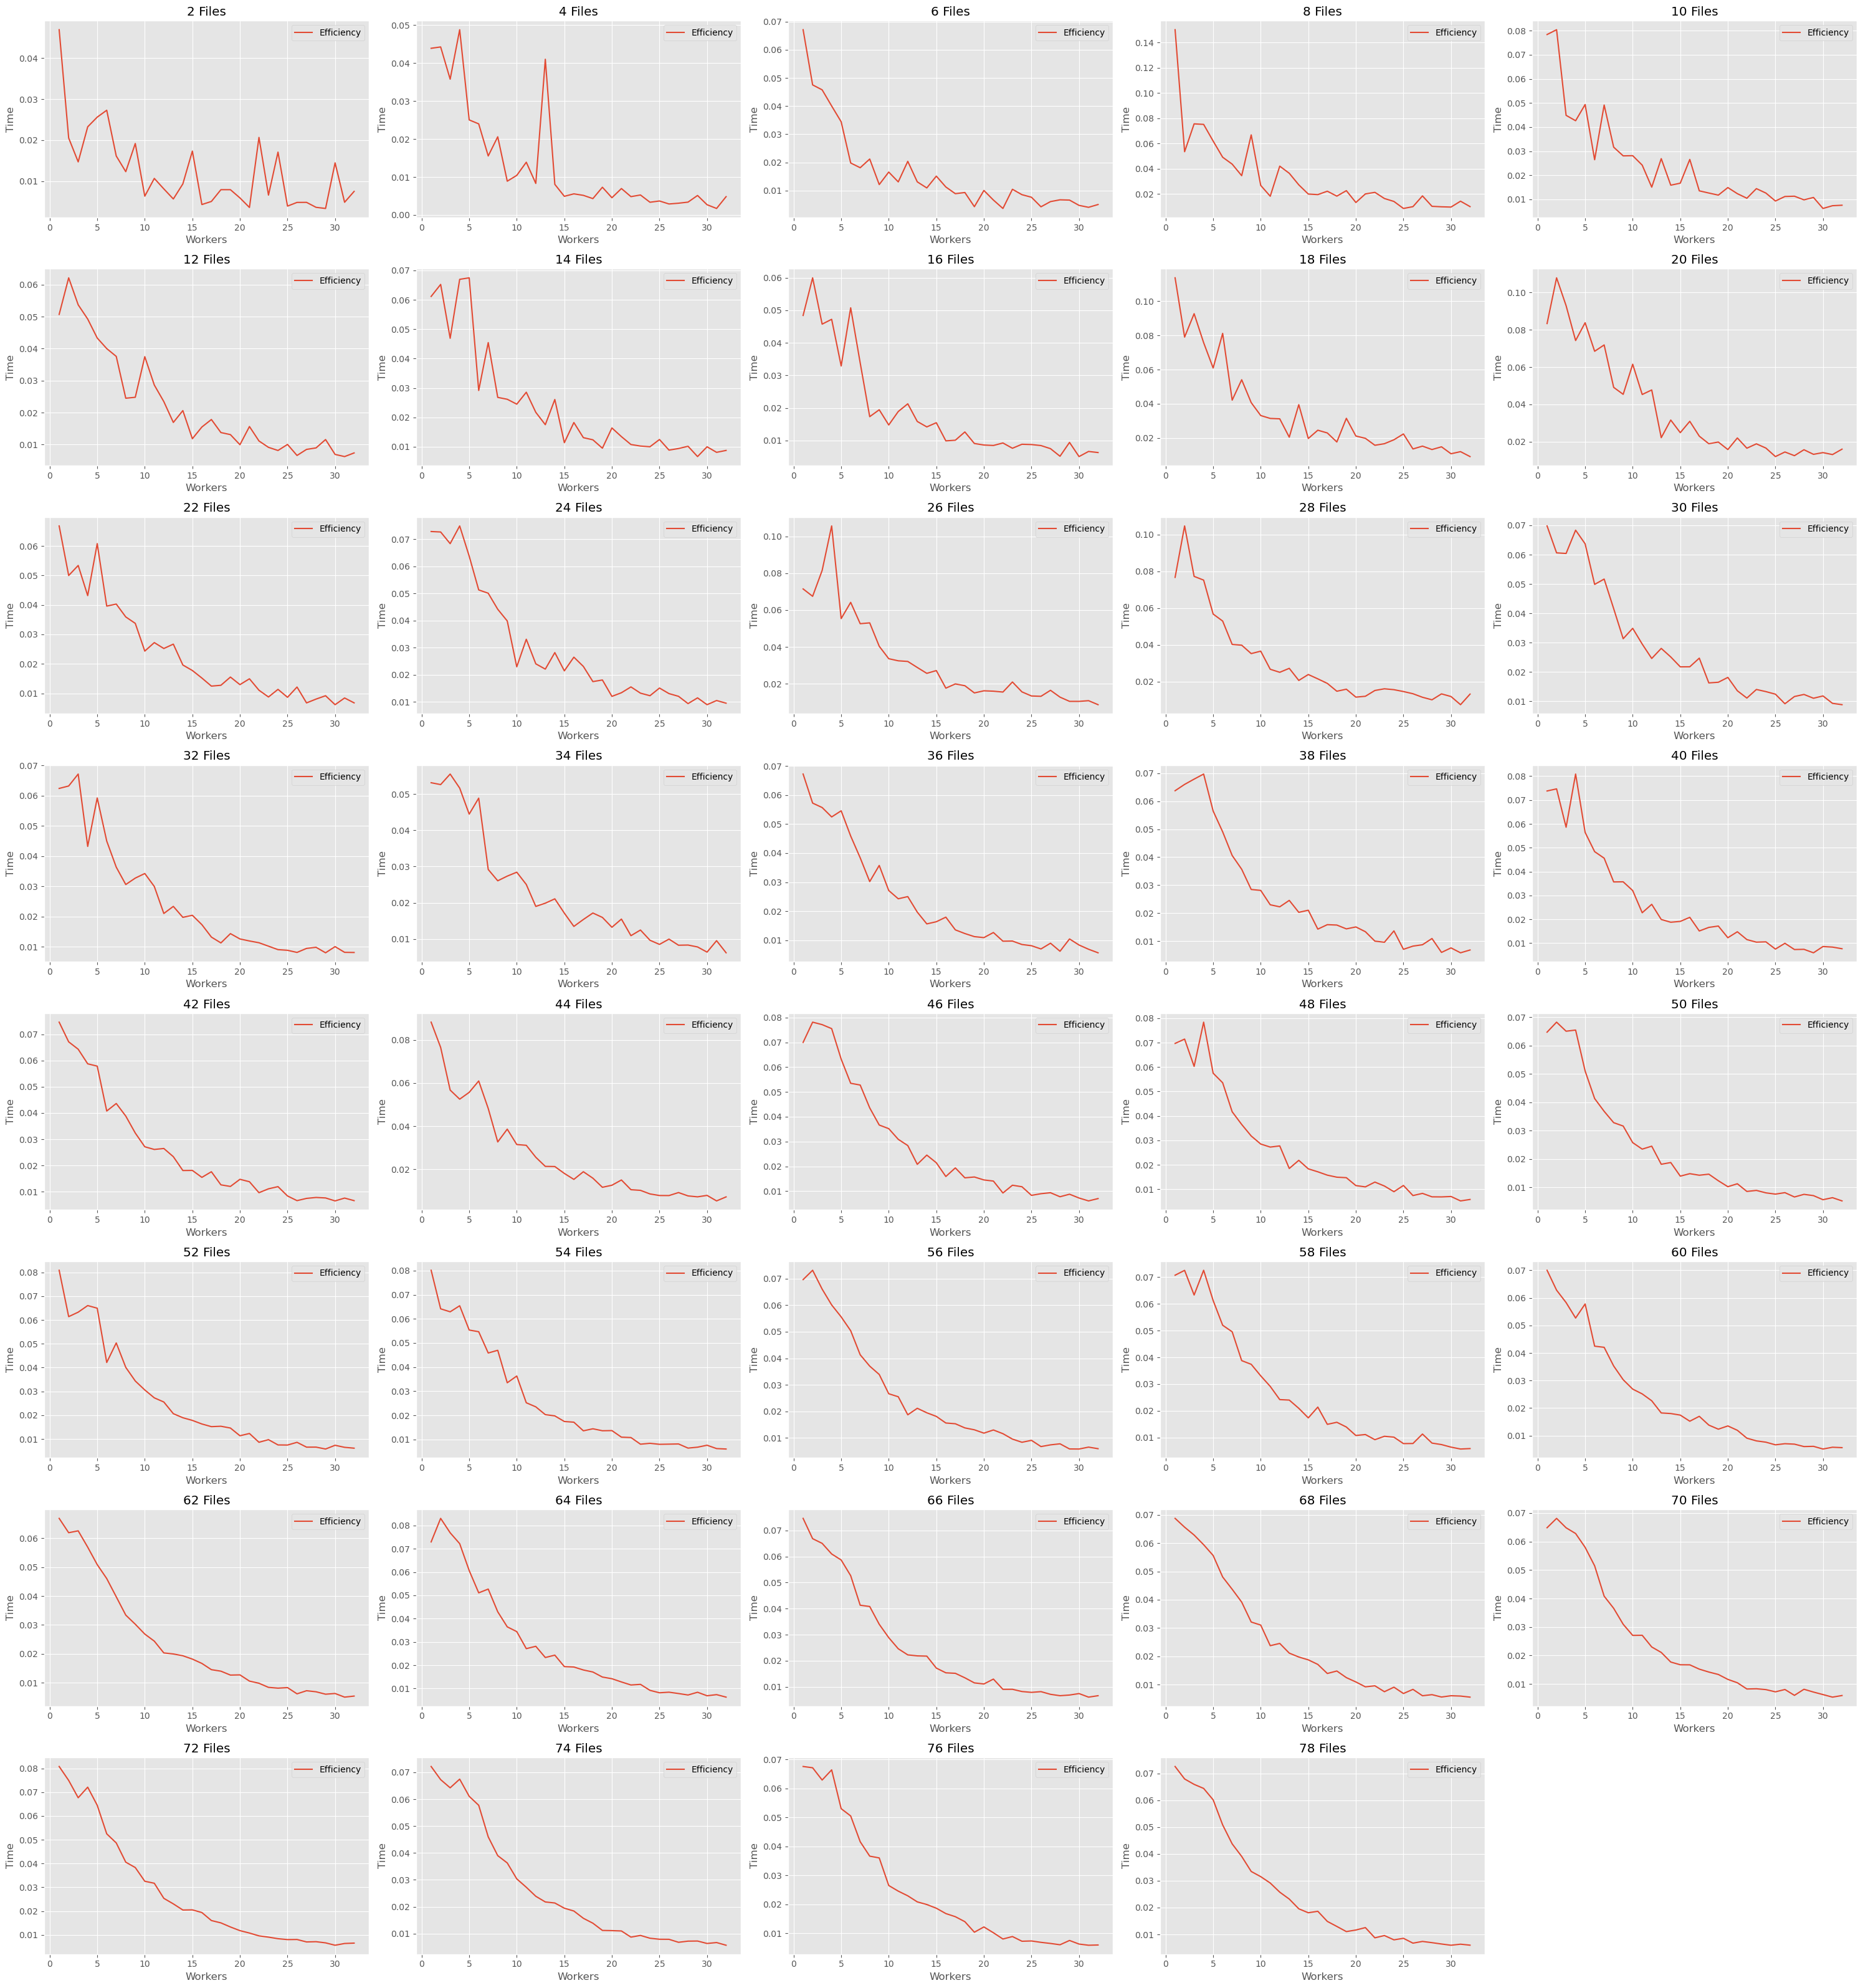

In [42]:

unique_y = np.unique(y)
x_values = x
y_values = y
z_values = z

fig, axes = plt.subplots(8, 5, figsize=(30, 32))

# Iterate through unique y values and create subplots
for i, y_val in enumerate(unique_y):
    # Filter data for the current y value
    x_sub = x_values[y_values == y_val]
    z_sub = z_values[y_values == y_val]
    
    x_sub = np.array(x_sub)
    z_sub = np.array(z_sub)
    
    sort_indices = np.argsort(x_sub)
    x_sub = x_sub[sort_indices]
    z_sub = z_sub[sort_indices]

    # Calculate subplot position in the grid
    row = i // 5
    col = i % 5

    # Create a subplot
    ax = axes[row, col]

    # Plot x vs. z for the current y value
    ax.plot(x_sub, z_sub, label=f'Efficiency')

    # Customize subplot appearance
    ax.set_title(f'{y_val} Files')
    ax.set_xlabel('Workers')
    ax.set_ylabel('Time')
    ax.legend()


fig.delaxes(axes[7][4])
# Adjust layout and save the figure
plt.tight_layout()
# plt.savefig('subplots_grid.png', dpi=300)
plt.show()


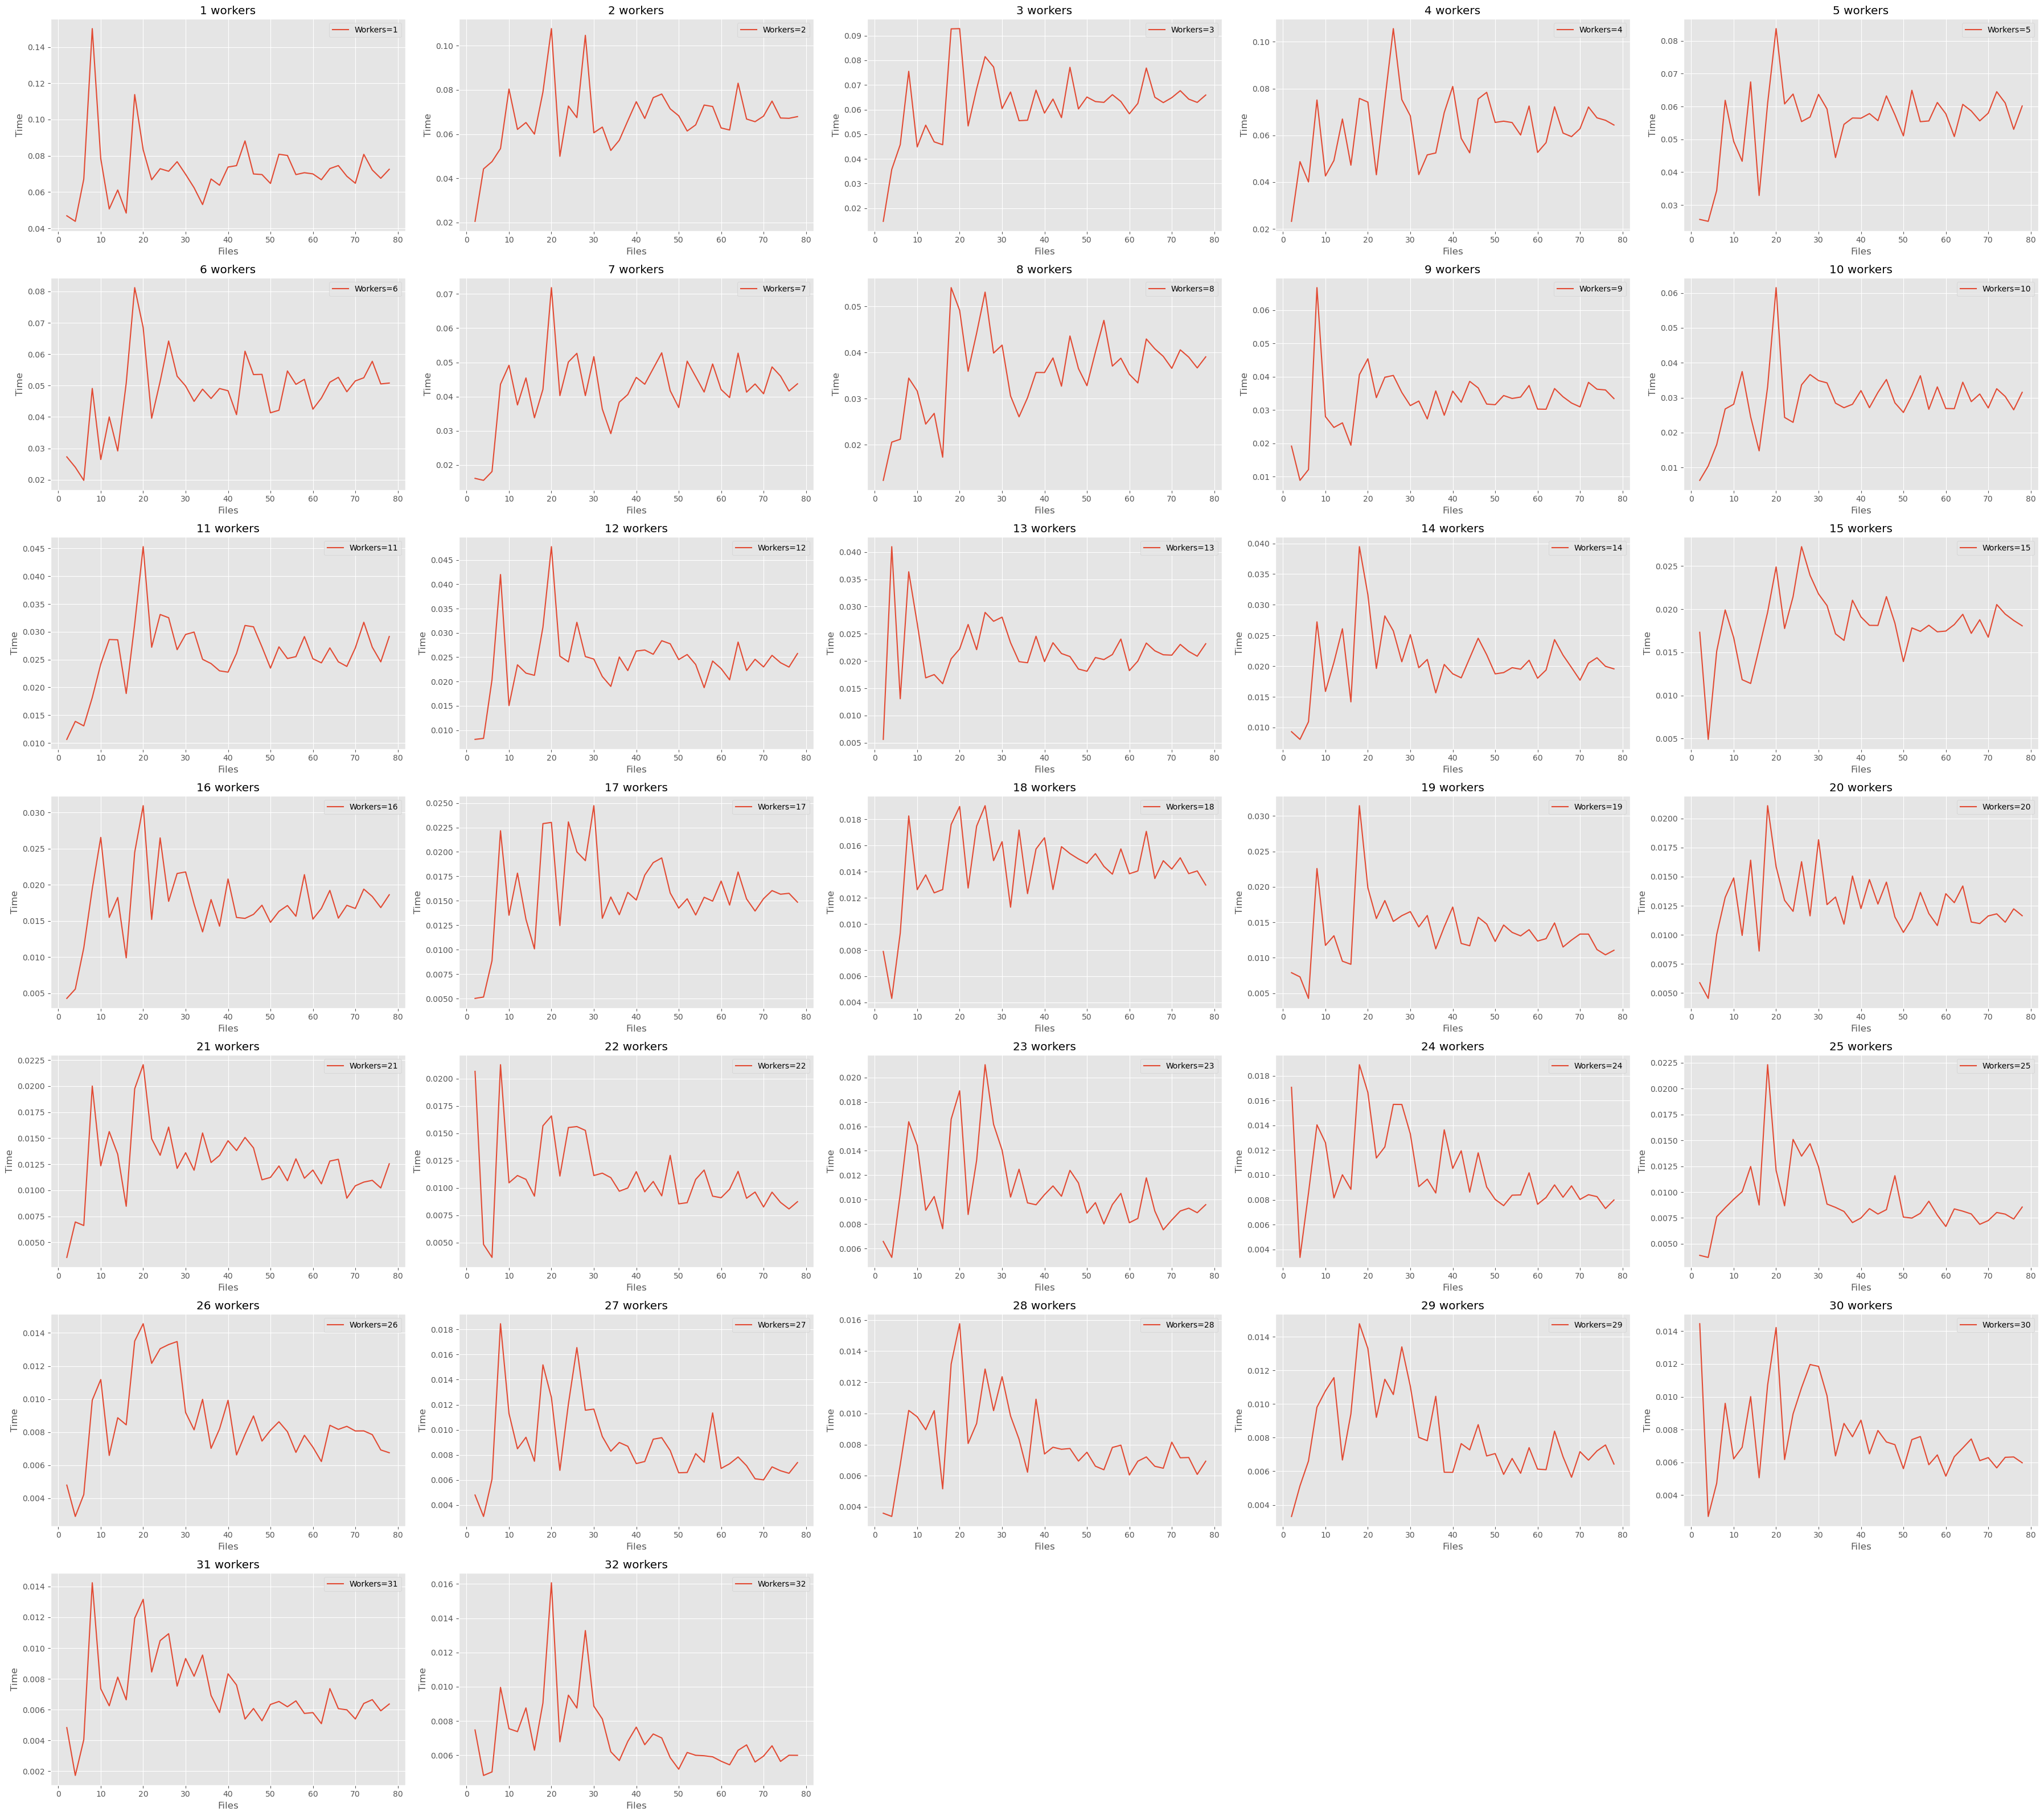

In [43]:

unique_x = np.unique(x)
x_values = x
y_values = y
z_values = z

fig, axes = plt.subplots(7, 5, figsize=(36, 32))

# Iterate through unique y values and create subplots
for i, x_val in enumerate(unique_x):
    # Filter data for the current y value
    y_sub = y_values[x_values == x_val]
    z_sub = z_values[x_values == x_val]
    
    y_sub = np.array(y_sub)
    z_sub = np.array(z_sub)
    
    sort_indices = np.argsort(y_sub)
    y_sub = y_sub[sort_indices]
    z_sub = z_sub[sort_indices]

    # Calculate subplot position in the grid
    row = i // 5
    col = i % 5

    # Create a subplot
    ax = axes[row, col]

    # Plot x vs. z for the current y value
    ax.plot(y_sub, z_sub, label=f'Workers={x_val}')

    # Customize subplot appearance
    ax.set_title(f'{x_val} workers')
    ax.set_xlabel('Files')
    ax.set_ylabel('Time')
    ax.legend()


fig.delaxes(axes[6][2])
fig.delaxes(axes[6][4])
fig.delaxes(axes[6][3])
# Adjust layout and save the figure
plt.tight_layout()
# plt.savefig('subplots_grid.png', dpi=300)
plt.show()
